# Runge-Kutta Methods

## 1. Order reduction

Before introducing the method, it is worth noticing that usually ODEs are presented as high-order differential equations, which is generally the main source of difficulties when looking for a solution, be it analytical or numerical.

However, if we write our ODE in terms of an implicit solution function, it is possible to introduce dummy variables that account for the higher-order derivatives of our main function, while allowing us to rewrite the ODE as an ODE system (or, equivalently, a vector ODE).

### 1.1 A simple introduction

First, let's see the simplest case: a second order ODE. Suppose we want to solve the equation

\begin{eqnarray}
y''(t) &=& f\left(t,y,y'\right)
\end{eqnarray}

with initial conditions $y(t_0)=y_0$ and $y'(t_0)=y'_0$. Then, if we define $y_1(t)=y(t)$ and $y_2(t)=y'(t)$, we have the following identities:

\begin{eqnarray}
y''(t) &=& f\left(t,y,y'\right)\\
 &=& f\left(t,y_1,y_2\right)\\
 &=& y_2'(t)
\end{eqnarray}

thus obtaining the system

\begin{eqnarray}
y_1'(t) &=& y_2(t)\\
y_2'(t) &=& f\left(t,y_1,y_2\right)
\end{eqnarray}

which we can rewrite as

\begin{eqnarray}
\vec{Y}'(t) &=& \vec{F}\left(t,\vec{Y}\right)
\end{eqnarray}

where $\vec{Y}(t)=\left(y_1(t),y_2(t)\right)$ and $\vec{F}(t)=\left(y_2(t),f\left(t,y_1,y_2\right)\right)$, with initial condition $\vec{Y}(t_0)=\vec{Y}_0=\left(y_0,y'_0\right)$.

### 1.2 The general case

Let

\begin{eqnarray}
y^{[n]}(t) &=& f\left(t,y,y',y'',...,y^{[n-1]}\right)
\end{eqnarray}

with initial conditions $y(t_0)=y_0$, $y'(t_0)=y'_0$, ..., $y^{[n-1]}(t_0)=y^{[n-1]}_0$.

By defining $y_1(t)=y(t)$, $y_2(t)=y'(t)$, ..., $y_n(t)=y^{[n-1]}(t)$ we have the following identities:

\begin{eqnarray}
y^{[n]}(t) &=& f\left(t,y,y',y'',...,y^{[n-1]}\right)\\
 &=& f\left(t,y_1,y_2,y_3,...,y_n\right)\\
 &=& y_n'(t)
\end{eqnarray}

thus obtaining the system

\begin{eqnarray}
y_1'(t) &=& y_2(t)\\
y_2'(t) &=& y_3(t)\\
 &\vdots& \\
y_{n-1}'(t) &=& y_n(t)\\
y_n'(t) &=& f\left(t,y_1,y_2,y_3,...,y_n\right)
\end{eqnarray}

which we can rewrite as

\begin{eqnarray}
\vec{Y}'(t) &=& \vec{F}\left(t,\vec{Y}\right)
\end{eqnarray}

where $\vec{Y}(t)=\left(y_1(t),\ldots,y_n(t)\right)$ and $\vec{F}(t)=\left(y_2(t),\ldots,f\left(t,y_1,\ldots,y_n\right)\right)$, with initial condition $\vec{Y}(t_0)=\vec{Y}_0=\left(y_0,y'_0,\ldots,y^{[n-1]}_0\right)$.

### 1.3 A useful sidenote

There are some cases in which $\vec{F}$ can be written as a product between a matrix $\underline{M}$ and a vector $(y_1,...,y_n)$, so the equation would finally read as

\begin{eqnarray}
\vec{Y}'(t) &=& \underline{M}(t)\cdot\vec{Y}(t)
\end{eqnarray}

This is the case for linear equations or when inspecting equations local stability (as a linearized version of the original problem).


## 2. Runge-Kutta

The following method assumes that we start from an initial state $t_0$, $\vec{Y}(t_0)=\vec{Y}_0$ to get $\vec{F}_0=\vec{F}\left(t_0,\vec{Y_0}\right)$.

Using this notation, we can move a step of length $h$, obtaining

\begin{eqnarray}
t_{n+1} &=& t_n+h\\
\vec{Y}_{n+1} &=& \vec{Y}(t_n+h)\\
\vec{F}_{n+1} &=& \vec{F}\left(t_{n+1},\vec{Y}_{n+1}\right)
\end{eqnarray}

To make this notation even more general, it is possible to define

\begin{eqnarray}
t_{n+\alpha} &=& t_n+\alpha h\\
\vec{Y}_{n+\alpha} &=& \vec{Y}(t_n+\alpha h)\\
\vec{F}_{n+\alpha} &=& \vec{F}\left(t_{n+\alpha},\vec{Y}_{n+\alpha}\right)
\end{eqnarray}

with $\alpha\in\mathbb{R}$.

### 2.1 RK2

Let

\begin{eqnarray}
\vec{Y}'(t) &=& \vec{F}\left(t,\vec{Y}\right)\\
\vec{Y}(0) &=& \vec{Y}_0
\end{eqnarray}

We can expand two Taylor approximations as

\begin{eqnarray}
\vec{Y}_{n+1} &=& \vec{Y}_n+h\vec{Y}'_n+\frac{h^2}{2}\vec{Y}''_n+\mathcal{O}\left(h^3\right)\\
\vec{Y}'_{n+\frac{1}{2}} &=& \vec{Y}'_n+\frac{h}{2}\vec{Y}''_n+\mathcal{O}\left(h^2\right)
\end{eqnarray}

If we multiply the last equation by $h$, we can deduce that

\begin{eqnarray}
\frac{h^2}{2}\vec{Y}''_n &=& \left(\vec{Y}'_{n+\frac{1}{2}}-\vec{Y}'_n\right)h+\mathcal{O}\left(h^3\right)\\
 &=& \left(\vec{F}_{n+\frac{1}{2}}-\vec{Y}'_n\right)+\mathcal{O}\left(h^3\right)
\end{eqnarray}

Plugging this last expression in our estimation of $\vec{Y}_{n+1}$, we obtain

\begin{eqnarray}
\vec{Y}_{n+1} &=& \vec{Y}_n+h\vec{F}\left(t_n+\frac{h}{2},\vec{Y}_n+\frac{h}{2}\vec{F}_n\right)
\end{eqnarray}

This last result is known as **RK2**, which can be written in terms of sequential steps as

\begin{eqnarray}
\vec{k}_1 &=& h\vec{F}\left(t_n,\vec{Y}_n\right)\\
\vec{k}_2 &=& h\vec{F}\left(t_n+\frac{h}{2},\vec{Y}_n+\frac{1}{2}\vec{k}_1\right)\\
\vec{Y}_{n+1} &=& \vec{Y}_n+\vec{k}_2+\mathcal{O}\left(h^3\right)
\end{eqnarray}

In a similar fashion, we can create more accurate versions of this method, leading to a third and fourth order Runge-Kutta method.

### 2.2 RK3

\begin{eqnarray}
\vec{k}_1 &=& h\vec{F}\left(t_n,\vec{Y}_n\right)\\
\vec{k}_2 &=& h\vec{F}\left(t_n+\frac{h}{2},\vec{Y}_n+\frac{1}{2}\vec{k}\right)\\
\vec{k}_3 &=& h\vec{F}\left(t_n+h,\vec{Y}_n-\vec{k}_1+2\vec{k}_2\right)\\
\vec{Y}_{n+1} &=& \vec{Y}_n+\frac{1}{6}\left(\vec{k}_1+4\vec{k}_2+\vec{k}_3\right)+\mathcal{O}\left(h^4\right)
\end{eqnarray}

### 2.3 RK4

\begin{eqnarray}
\vec{k}_1 &=& h\vec{F}\left(t_n,\vec{Y}_n\right)\\
\vec{k}_2 &=& h\vec{F}\left(t_n+\frac{h}{2},\vec{Y}_n+\frac{1}{2}\vec{k}_1\right)\\
\vec{k}_3 &=& h\vec{F}\left(t_n+\frac{h}{2},\vec{Y}_n+\frac{1}{2}\vec{k}_2\right)\\
\vec{k}_4 &=& h\vec{F}\left(t_n+h,\vec{Y}_n+\vec{k}_3\right)\\
\vec{Y}_{n+1} &=& \vec{Y}_n+\frac{1}{6}\left(\vec{k}_1+2\vec{k}_2+2\vec{k}_3+\vec{k}_4\right)+\mathcal{O}\left(h^5\right)
\end{eqnarray}


In [1]:
# From now on, F(t, Y) is a function you can define as
# desired, assuming order-reduced ODE

import numpy as np

In [2]:
def RK2_one_step(t, init_cond, h, F, par=None):
    
    k1 = h * F(t, init_cond, par)
    k2 = h * F(t + h / 2, init_cond + k1 / 2, par)
    
    t += h
    init_cond += k2
    
    return t, init_cond

In [3]:
def RK3_one_step(t, init_cond, h, F, par=None):
    
    k1 = h * F(t, init_cond, par)
    k2 = h * F(t + h / 2, init_cond + k1 / 2, par)
    k3 = h * F(t + h, init_cond - k1 + 2 * k2, par)
    
    t += h
    init_cond += (k1 + 4 * k2 + k3) / 6
    
    return t, init_cond

In [4]:
def RK4_one_step(t, init_cond, h, F, par):
    
    k1 = h * F(t, init_cond, par)
    k2 = h * F(t + h / 2, init_cond + k1 / 2, par)
    k3 = h * F(t + h / 2, init_cond + k2 / 2, par)
    k4 = h * F(t + h, init_cond + k3, par)
    
    t += h
    init_cond += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    return t, init_cond

## 3. Examples

### 3.1 Damped pendulum

We try to obtain the position of a damped, forced pendulum. Damping is due to a viscous friction force and forcing is periodic.

The pendulum consists of a stiff, ideal rod of length $L$, neglectible mass, with a mass $m$ attached to its pending end. The supporting end is not fixed, but oscillates vertically with amplitude $A$ and frequency $\nu$. The equation that models this situation for the angle $\theta$ of the pendulum is

\begin{eqnarray}
\ddot{\theta}+\gamma\dot{\theta}+\omega^2_0\sin\theta &=& -\frac{(2\pi\nu)^2A}{L}\cos(2\pi\nu t)
\end{eqnarray}

where $\omega^2_0=\frac{g}{L}$.

Notice we can transform this second order equation to the first order vector equation

\begin{eqnarray}
\vec{\Theta}'(t) &=& \vec{F}\left(t,\vec{\Theta}\right)
\end{eqnarray}

given explicitly by

\begin{eqnarray}
\theta'_1(t) &=& \theta_2(t) \\
\theta'_2(t) &=& -\gamma\theta_2(t)-\omega^2_0\sin\theta_1(t) -\frac{(2\pi\nu)^2A}{L}\cos(2\pi\nu t)
\end{eqnarray}


In [5]:
def F1(t, y, par={'A':0.01, 'g':9.8, 'gamma':0.1, 'L':1, 'nu':1}):
    
    damping = -par['gamma'] * y[1]
    weight = - ((par['g'] / par['L']) ** 2) * np.sin(y[0])
    forcing = - (((2 * np.pi * par['nu']) ** 2 * par['A']) / par['L']) * np.cos(2 * np.pi * par['nu'] * t)
    
    theta_prime1 = y[1]
    theta_prime2 = damping + weight + forcing
    
    theta_prime = np.asarray([theta_prime1, theta_prime2])
    
    return theta_prime

In [6]:
# Explore some solutions

par1 = {'A':0.07, 'g':9.8, 'gamma':0.1, 'L':1, 'nu':1}
init_cond1 = np.asarray([np.pi / 18, 0])

par2 = {'A':0.3, 'g':9.8, 'gamma':0.4, 'L':1, 'nu':3}
init_cond2 = np.asarray([np.pi / 18, 0])

init_cond3 = np.asarray([17 * np.pi / 18, 0])

In [7]:
# Let's use the RK4 method for this one example
# We will evaluate solutions in the time interval [0, 25] in seconds

h = 0.01
t_ini = 0
t_fin = 25
steps = int((t_fin - t_ini) / h) + 1

times = np.zeros((steps, 1))
sol1 = np.zeros((steps, init_cond1.shape[0]))
sol2 = np.zeros((steps, init_cond2.shape[0]))
sol3 = np.zeros((steps, init_cond3.shape[0]))

sol1[0] = init_cond1
sol2[0] = init_cond2
sol3[0] = init_cond3


In [8]:
t_ini1 = t_ini
t_ini2 = t_ini
t_ini3 = t_ini

for step in range(steps):
    t_ini1, init_cond1 = RK4_one_step(t_ini1, init_cond1, h, F1, par1)
    t_ini2, init_cond2 = RK4_one_step(t_ini2, init_cond2, h, F1, par2)
    t_ini3, init_cond3 = RK4_one_step(t_ini3, init_cond3, h, F1, par2)
    
    times[step] = t_ini1
    sol1[step] = init_cond1
    sol2[step] = init_cond2
    sol3[step] = init_cond3
    

In [9]:
import matplotlib.pyplot as plt

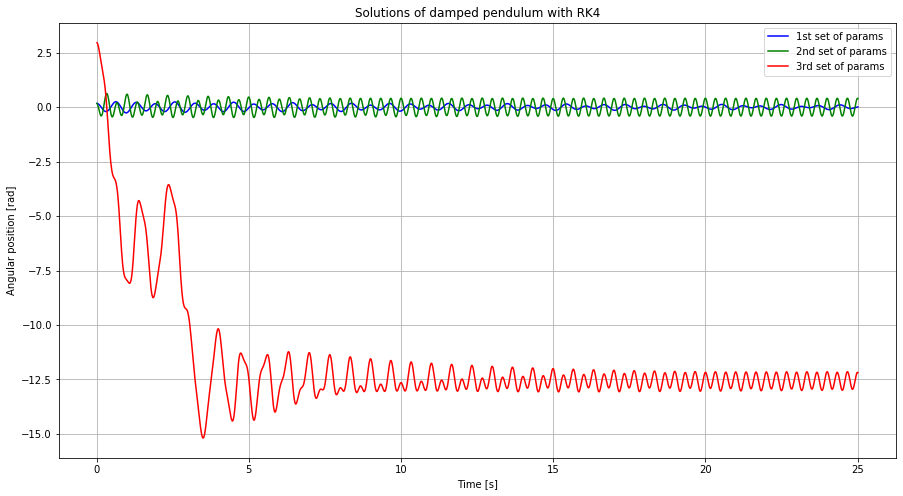

In [10]:
plt.figure(figsize=(15, 8))

plt.plot(times, sol1[:, 0], color='blue', label='1st set of params')
plt.plot(times, sol2[:, 0], color='green', label='2nd set of params')
plt.plot(times, sol3[:, 0], color='red', label='3rd set of params')

plt.xlabel('Time [s]')
plt.ylabel('Angular position [rad]')
plt.title('Solutions of damped pendulum with RK4')

plt.legend()
plt.grid()

plt.show()


## 4. Pros & Cons

The previous setting can be extended up to an arbitrary $N$-th order method, to obtain a highly accurate $\mathcal{O}\left(h^{N+1}\right)$, stable algorithm. Another advantnage is the possibility to adapt the step $h$ in each iteration, which can make its use a bit more efficient than if it were used with a constant step.

The high order performance comes with the cost of having to evaluate the design function $\vec{F}$ a total of $N$ times at each iteration.

Finally, an important constrain is that initial conditions should be given on each one of the dervatives of the objective function, leaving out problems with multiple fixed-time conditions.
